# **Support Vector Regression**

In [6]:
%matplotlib inline
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split

- **Sinusoid dataset**
    - 복잡한 sinusoid 데이터에 대해서 fitting에 보도록 하겠습니다.

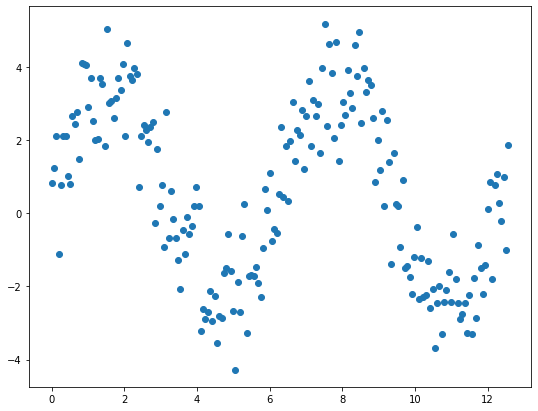

In [7]:
plt.figure(figsize=(9,7))
N = 200 # number of data points
x = np.linspace(0, 4*np.pi, N)
y = 3.0*np.sin(x+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise
plt.scatter(x, y)

In [8]:
x[0:5]

array([0.        , 0.06314759, 0.12629518, 0.18944277, 0.25259036])

- input shape (1,) -> (1,1)

In [11]:
x=x.reshape(-1,1)
x[0:5]

array([[0.        ],
       [0.06314759],
       [0.12629518],
       [0.18944277],
       [0.25259036]])

In [12]:
# Fit regression model
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2, epsilon = 0.1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon = 0.1)

y_lin = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)
y_rbf = svr_rbf.fit(x, y).predict(x)

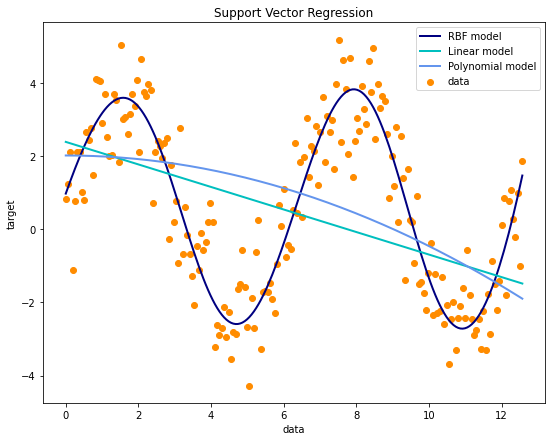

In [13]:
# Look at the results
plt.figure(figsize=(9,7))

lw = 2
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(x, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

# **SVR hyperparameters**

<p align="center"><img width="600" height="auto" src="./images/svr.png"></p>

**param1: $\varepsilon$**

$(-\varepsilon, + \varepsilon)$ 사이에 있는 error는 0으로 취급

**param2:** $C \rightarrow$ margin $\xi$

margin $\xi$에 penalty $C$가 곱해져 목적함수에 더 해짐

$$ \frac{1}{2} ||w||^{2} + C \sum_{i=1}^{l}(\xi_i + \xi_i^{*})$$

**param3: $\gamma$**$\rightarrow$ kernel function RBF

$$ k(x,x^{'}) = \frac{\exp(-{||x-x^{'}||}^2)}{\sigma} = \exp(-\gamma{||x-x^{'}||}^2)$$

- grid search

In [14]:
parameters = {'kernel':['rbf'] ,
              'C':np.logspace(-1,1,2),
              'gamma': np.logspace(-1,1,2),
              'epsilon':np.logspace(-1,1,2)}
parameters

{'kernel': ['rbf'],
 'C': array([ 0.1, 10. ]),
 'gamma': array([ 0.1, 10. ]),
 'epsilon': array([ 0.1, 10. ])}

In [16]:
svr = SVR() 
clf = GridSearchCV(estimator=svr, param_grid=parameters, scoring='neg_mean_squared_error')

In [17]:
clf.fit(x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([ 0.1, 10. ]),
                         'epsilon': array([ 0.1, 10. ]),
                         'gamma': array([ 0.1, 10. ]), 'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [18]:
clf.best_params_

{'C': 10.0, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

- best model

In [19]:
svr = SVR(kernel='rbf', 
          C=clf.best_params_['C'],
          epsilon=clf.best_params_['epsilon'], 
          gamma = clf.best_params_['gamma'])
svr.fit(x,y)

SVR(C=10.0, gamma=0.1)

In [20]:
pred_y = svr.predict(x)

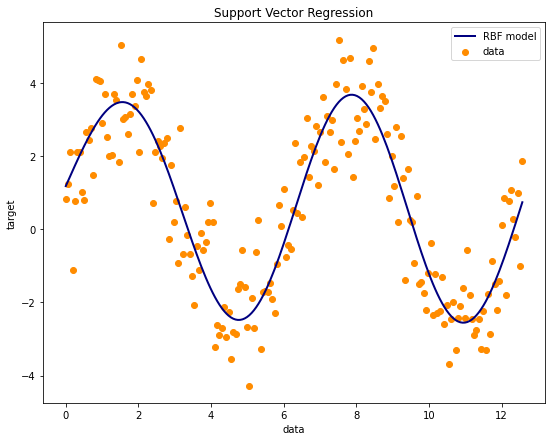

In [21]:
# Look at the results
plt.figure(figsize=(9,7))

lw = 2
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, pred_y, color='navy', lw=lw, label='RBF model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

---